# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
!pip install citipy

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
import json
import requests

# Set the API base URL
base_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    # Set the API base URL
    base_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'

        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    
    # Create parameters for API key
    params = {
        'q': city,
        'appid': weather_api_key,
    }

    # Run an API request for each of the cities
    try:
       
        city_response = requests.get(base_url).json()
        print(city_response)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_response["coord"]["lat"]
        city_lng = city_response["coord"]["lon"]
        city_max_temp = city_response["main"]["temp_max"]
        city_humidity = city_response["main"]["humidity"]
        city_clouds = city_response["clouds"]["all"]
        city_wind = city_response["wind"]["speed"]
        city_country = city_response["sys"]["country"]
        city_date = city_response["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        print(city_response)

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"Error processing {city}: {str(e)}")
        print("City not found. Skipping...")

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
{'coord': {'lon': -68.3, 'lat': -54.8}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 288.96, 'feels_like': 288.14, 'temp_min': 288.96, 'temp_max': 288.96, 'pressure': 981, 'humidity': 59}, 'visibility': 10000, 'wind': {'speed': 2.57, 'deg': 0}, 'clouds': {'all': 40}, 'dt': 1707064326, 'sys': {'type': 1, 'id': 8303, 'country': 'AR', 'sunrise': 1707037333, 'sunset': 1707093114}, 'timezone': -10800, 'id': 3833367, 'name': 'Ushuaia', 'cod': 200}
{'coord': {'lon': -68.3, 'lat': -54.8}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 288.96, 'feels_like': 288.14, 'temp_min': 288.96, 'temp_max': 288.96, 'pressure': 981, 'humidity': 59}, 'visibility': 10000, 'wind': {'speed': 2.57, 'deg': 0}, 'clouds': {'all': 40}, 'dt': 170706432

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [28]:
print(city_data)

[]


In [6]:
# Display sample data
city_data_df


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,288.96,59,40,2.57,AR,1707064326
1,guaranda,-1.6000,-79.0000,290.30,82,100,2.53,EC,1707064506
2,aylesbury,51.8167,-0.8146,286.25,88,100,8.53,GB,1707064506
3,minzhu,43.7286,127.3447,249.17,99,34,1.52,CN,1707064506
4,port-aux-francais,-49.3500,70.2167,277.90,73,71,11.54,TF,1707064507
...,...,...,...,...,...,...,...,...,...
571,nueve de julio,-35.4444,-60.8831,305.77,12,10,3.83,AR,1707064607
572,tocopilla,-22.0920,-70.1979,298.64,62,7,1.71,CL,1707064607
573,dunedin,-45.8742,170.5036,286.93,74,78,0.89,NZ,1707064607
574,mora,11.0461,14.1401,300.93,12,39,3.54,CM,1707064607


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,288.96,59,40,2.57,AR,1707064326
1,guaranda,-1.6000,-79.0000,290.30,82,100,2.53,EC,1707064506
2,aylesbury,51.8167,-0.8146,286.25,88,100,8.53,GB,1707064506
3,minzhu,43.7286,127.3447,249.17,99,34,1.52,CN,1707064506
4,port-aux-francais,-49.3500,70.2167,277.90,73,71,11.54,TF,1707064507


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

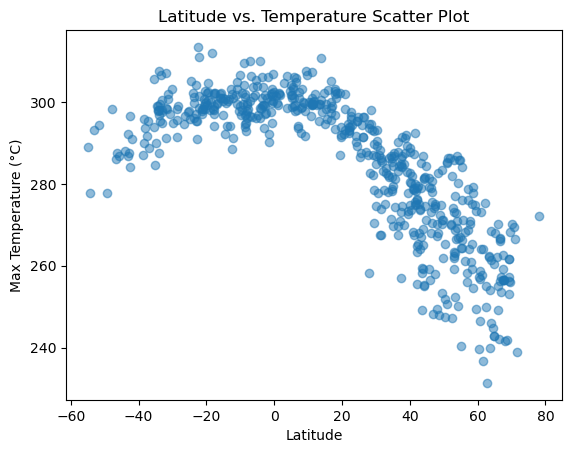

In [14]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], alpha=0.5)  

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')  # Replace 'Temperature' with the appropriate unit if needed
plt.title('Latitude vs. Temperature Scatter Plot')

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

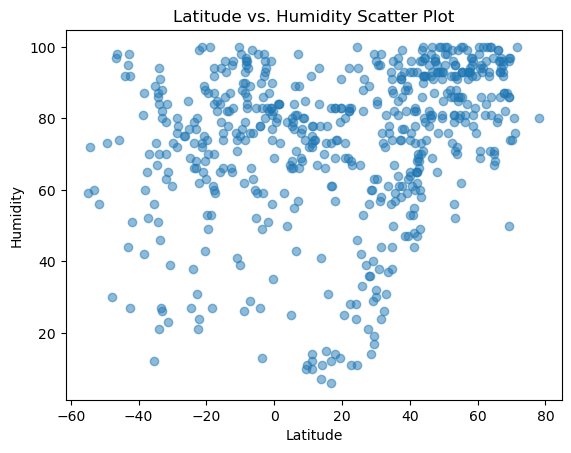

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], alpha=0.5)  

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity')  # Replace 'Temperature' with the appropriate unit if needed
plt.title('Latitude vs. Humidity Scatter Plot')

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

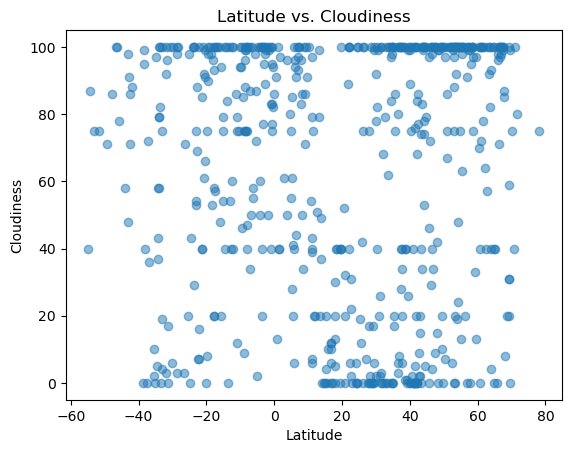

In [16]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], alpha=0.5)  

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')  # Replace 'Temperature' with the appropriate unit if needed
plt.title('Latitude vs. Cloudiness')

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

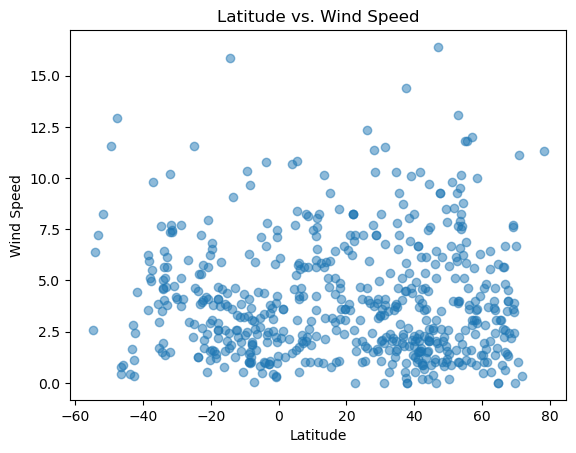

In [17]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], alpha=0.5)  

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')  # Replace 'Temperature' with the appropriate unit if needed
plt.title('Latitude vs. Wind Speed')

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [20]:
# Define a function to create Linear Regression plots
import seaborn as sns

def linear_regression_plot(x, y, title, x_label, y_label):
    sns.regplot(x=x, y=y, scatter_kws={'alpha':0.5})
    
    # Add labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    # Show the plot
    plt.show()

In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,aylesbury,51.8167,-0.8146,286.25,88,100,8.53,GB,1707064506
3,minzhu,43.7286,127.3447,249.17,99,34,1.52,CN,1707064506
5,mont-de-marsan,44.0000,-0.6667,286.81,100,100,1.54,FR,1707064507
7,farah,32.5000,62.5000,278.60,26,0,0.55,AF,1707064507
8,iqaluit,63.7506,-68.5145,254.00,71,100,4.63,CA,1707064249


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,288.96,59,40,2.57,AR,1707064326
1,guaranda,-1.6000,-79.0000,290.30,82,100,2.53,EC,1707064506
4,port-aux-francais,-49.3500,70.2167,277.90,73,71,11.54,TF,1707064507
6,emerald,-23.5333,148.1667,296.12,79,100,5.32,AU,1707064507
9,west island,-12.1568,96.8225,301.14,83,40,2.57,CC,1707064376


###  Temperature vs. Latitude Linear Regression Plot

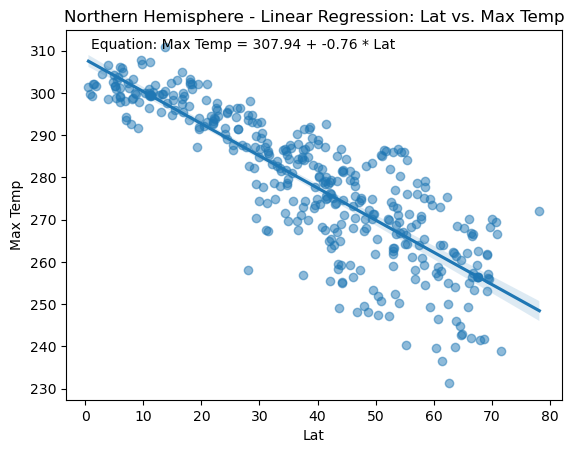

In [32]:
import statsmodels.api as sm

# Linear regression on Northern Hemisphere
x_column = 'Lat'
y_column = 'Max Temp'

# Create a linear regression plot for the Northern Hemisphere
sns.regplot(x=x_column, y=y_column, data=northern_hemi_df, scatter_kws={'alpha': 0.5})

X = sm.add_constant(northern_hemi_df[x_column]) 
model = sm.OLS(northern_hemi_df[y_column], X).fit()

intercept, slope = model.params['const'], model.params[x_column]

# Add labels and title
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.title('Northern Hemisphere - Linear Regression: {} vs. {}'.format(x_column, y_column))

equation_text = 'Equation: {} = {:.2f} + {:.2f} * {}'.format(y_column, intercept, slope, x_column)
plt.annotate(equation_text, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=10, ha='left')

# Show the plot
plt.show()


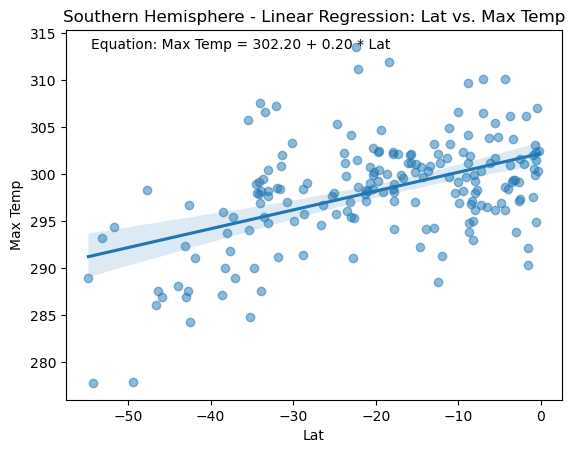

In [33]:
# Linear regression on Southern Hemisphere
x_column = 'Lat'
y_column = 'Max Temp'

# Create a linear regression plot for the Northern Hemisphere
sns.regplot(x=x_column, y=y_column, data=southern_hemi_df, scatter_kws={'alpha': 0.5})

X = sm.add_constant(southern_hemi_df[x_column]) 
model = sm.OLS(southern_hemi_df[y_column], X).fit()

intercept, slope = model.params['const'], model.params[x_column]

# Add labels and title
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.title('Southern Hemisphere - Linear Regression: {} vs. {}'.format(x_column, y_column))

equation_text = 'Equation: {} = {:.2f} + {:.2f} * {}'.format(y_column, intercept, slope, x_column)
plt.annotate(equation_text, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=10, ha='left')

# Show the plot
plt.show()



**Discussion about the linear relationship:** 

### Humidity vs. Latitude Linear Regression Plot

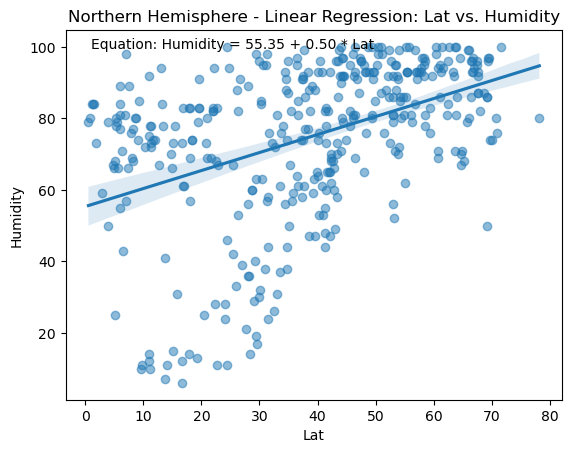

In [34]:
# Northern Hemisphere
x_column = 'Lat'
y_column = 'Humidity'

# Create a linear regression plot for the Northern Hemisphere
sns.regplot(x=x_column, y=y_column, data=northern_hemi_df, scatter_kws={'alpha': 0.5})

X = sm.add_constant(northern_hemi_df[x_column]) 
model = sm.OLS(northern_hemi_df[y_column], X).fit()

intercept, slope = model.params['const'], model.params[x_column]

# Add labels and title
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.title('Northern Hemisphere - Linear Regression: {} vs. {}'.format(x_column, y_column))

equation_text = 'Equation: {} = {:.2f} + {:.2f} * {}'.format(y_column, intercept, slope, x_column)
plt.annotate(equation_text, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=10, ha='left')

# Show the plot
plt.show()


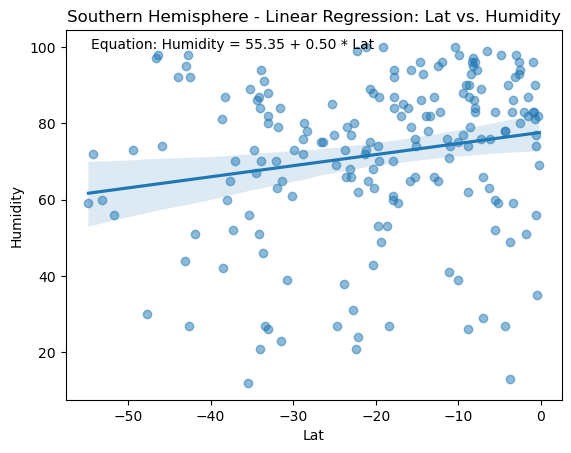

In [35]:
# Southern Hemisphere
x_column = 'Lat'
y_column = 'Humidity'

# Create a linear regression plot for the Southern Hemisphere
sns.regplot(x=x_column, y=y_column, data=southern_hemi_df, scatter_kws={'alpha': 0.5})

X = sm.add_constant(northern_hemi_df[x_column]) 
model = sm.OLS(northern_hemi_df[y_column], X).fit()

intercept, slope = model.params['const'], model.params[x_column]

# Add labels and title
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.title('Southern Hemisphere - Linear Regression: {} vs. {}'.format(x_column, y_column))

equation_text = 'Equation: {} = {:.2f} + {:.2f} * {}'.format(y_column, intercept, slope, x_column)
plt.annotate(equation_text, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=10, ha='left')

# Show the plot
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

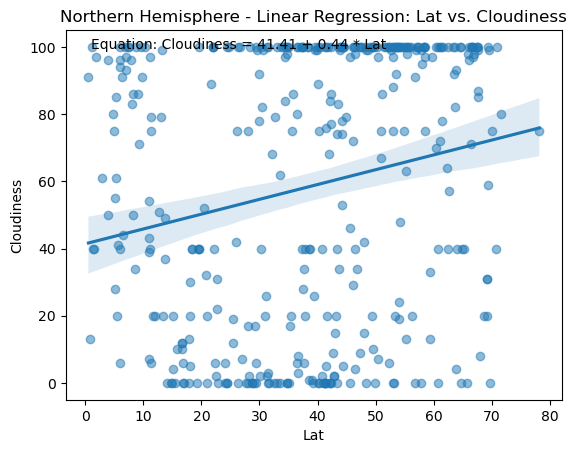

In [36]:
# Northern Hemisphere
x_column = 'Lat'
y_column = 'Cloudiness'

# Create a linear regression plot for the Northern Hemisphere
sns.regplot(x=x_column, y=y_column, data=northern_hemi_df, scatter_kws={'alpha': 0.5})

X = sm.add_constant(northern_hemi_df[x_column]) 
model = sm.OLS(northern_hemi_df[y_column], X).fit()

intercept, slope = model.params['const'], model.params[x_column]

# Add labels and title
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.title('Northern Hemisphere - Linear Regression: {} vs. {}'.format(x_column, y_column))

equation_text = 'Equation: {} = {:.2f} + {:.2f} * {}'.format(y_column, intercept, slope, x_column)
plt.annotate(equation_text, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=10, ha='left')

# Show the plot
plt.show()


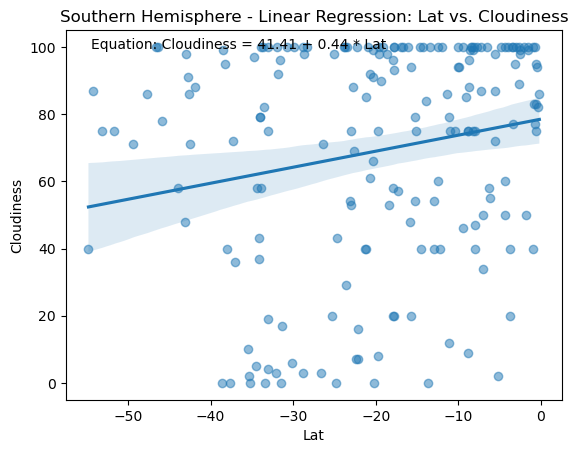

In [37]:
# Southern Hemisphere
x_column = 'Lat'
y_column = 'Cloudiness'

# Create a linear regression plot for the Southern Hemisphere
sns.regplot(x=x_column, y=y_column, data=southern_hemi_df, scatter_kws={'alpha': 0.5})

X = sm.add_constant(northern_hemi_df[x_column]) 
model = sm.OLS(northern_hemi_df[y_column], X).fit()

intercept, slope = model.params['const'], model.params[x_column]

# Add labels and title
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.title('Southern Hemisphere - Linear Regression: {} vs. {}'.format(x_column, y_column))

equation_text = 'Equation: {} = {:.2f} + {:.2f} * {}'.format(y_column, intercept, slope, x_column)
plt.annotate(equation_text, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=10, ha='left')

# Show the plot
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

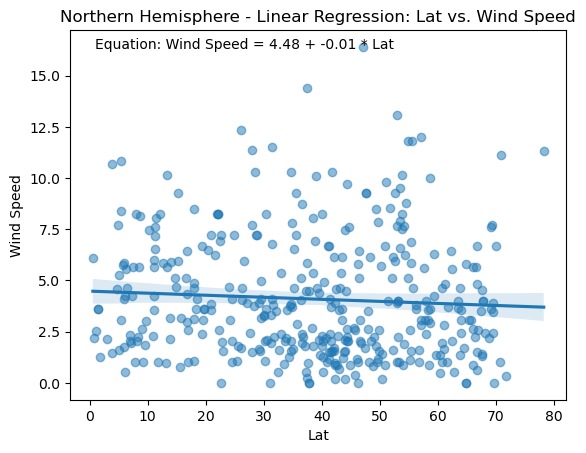

In [38]:
# Northern Hemisphere
x_column = 'Lat'
y_column = 'Wind Speed'

# Create a linear regression plot for the Northern Hemisphere
sns.regplot(x=x_column, y=y_column, data=northern_hemi_df, scatter_kws={'alpha': 0.5})

X = sm.add_constant(northern_hemi_df[x_column]) 
model = sm.OLS(northern_hemi_df[y_column], X).fit()

intercept, slope = model.params['const'], model.params[x_column]

# Add labels and title
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.title('Northern Hemisphere - Linear Regression: {} vs. {}'.format(x_column, y_column))

equation_text = 'Equation: {} = {:.2f} + {:.2f} * {}'.format(y_column, intercept, slope, x_column)
plt.annotate(equation_text, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=10, ha='left')

# Show the plot
plt.show()


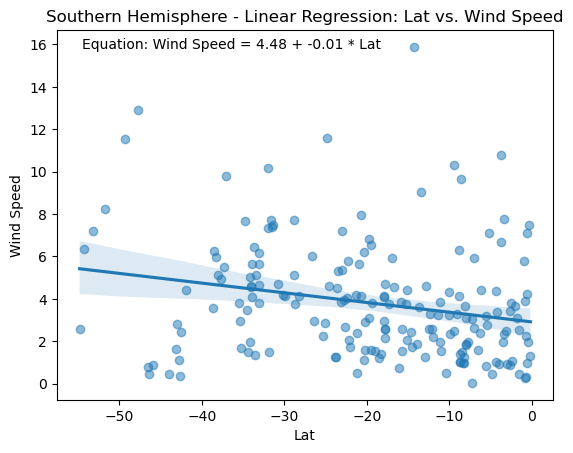

In [39]:
# Southern Hemisphere
x_column = 'Lat'
y_column = 'Wind Speed'

# Create a linear regression plot for the Southern Hemisphere
sns.regplot(x=x_column, y=y_column, data=southern_hemi_df, scatter_kws={'alpha': 0.5})

X = sm.add_constant(northern_hemi_df[x_column]) 
model = sm.OLS(northern_hemi_df[y_column], X).fit()

intercept, slope = model.params['const'], model.params[x_column]

# Add labels and title
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.title('Southern Hemisphere - Linear Regression: {} vs. {}'.format(x_column, y_column))

equation_text = 'Equation: {} = {:.2f} + {:.2f} * {}'.format(y_column, intercept, slope, x_column)
plt.annotate(equation_text, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=10, ha='left')

# Show the plot
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE